In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
counts_table_path = '/Users/stephaniecrilly/test/count_table.csv'
counts_table = pd.read_csv(counts_table_path, sep='\t')

Each column represents a given sort condition (concentration and bin). Normalizing the counts for each design (row) as a fraction of total counts matching library designs for each sort condition by dividing each value by the summed column counts. 

In [373]:
#divide every column by the sum of the column
norm_counts_table = counts_table.copy()
for col in norm_counts_table.columns:
    if col == 'design':
        continue
    else:
        norm_counts_table[col] = norm_counts_table[col] / norm_counts_table[col].sum() 

print(norm_counts_table)

                                design  r1-hs-8-1  r1-hs-2-4  r1-hs-5-3  \
0    01034_ALFA_53_7_min_0_53_g4s_loop   0.033530   0.006539   0.029063   
1    01934_ALFA_53_4_min_0_53_g4s_loop   0.000511   0.012743   0.000221   
2    02231_ALFA_53_4_min_0_53_g4s_loop   0.032103   0.022468   0.000069   
3   02532_ALFA_53_7_min_0_53_bm01_loop   0.001473   0.029678   0.007591   
4   02532_ALFA_53_8_min_0_53_bm01_loop   0.000869   0.016935   0.000071   
..                                 ...        ...        ...        ...   
92              bm01_L2_myc_ALFA_t6_v2   0.018414   0.004863   0.000108   
93              bm01_L3_myc_ALFA_t6_v2   0.009833   0.061871   0.000044   
94              bm01_L4_myc_ALFA_t6_v2   0.013752   0.006204   0.000064   
95              bm01_L5_myc_ALFA_t6_v2   0.016496   0.039403   0.004068   
96              bm01_L6_myc_ALFA_t6_v2   0.007261   0.016264   0.000005   

    r1-hs-7-1  r1-hs-7-2  r1-hs-2-3  r1-hs-8-2  r1-hs-5-4  r1-hs-1-1  ...  \
0    0.000154   0.0305

In [374]:
#get list of designs for plotting

designs_to_plot = 'min_2_53_g4s' #controls, min_0_52_g4s, min_0_52_bm01, min_0_53_g4s, min_0_53_bm01, min_2_52_g4s, min_2_52_bm01, min_2_53_g4s, min_2_53_bm01

list_of_designs = norm_counts_table.design.tolist() 
selected_designs = []

if designs_to_plot == 'controls':
    #controls
    selected_designs = ['bm01_ALFA_1c', 'bm01_ALFA_t2', 'bm01_ALFA_t3', 'bm01_ALFA_t6']
    color_palette = ['cyan', 'red', 'orange', 'green']

else:
    for design in list_of_designs:
        if designs_to_plot in design:
            selected_designs.append(design)

print(selected_designs)
print(len(selected_designs))

['07135_ALFA_53_10_min_2_53_g4s_loop', '07731_ALFA_53_1_min_2_53_g4s_loop', '07737_ALFA_53_7_min_2_53_g4s_loop', '07739_ALFA_53_5_min_2_53_g4s_loop', '08335_ALFA_53_10_min_2_53_g4s_loop', '08335_ALFA_53_9_min_2_53_g4s_loop', '08340_ALFA_53_2_min_2_53_g4s_loop', '08632_ALFA_53_7_min_2_53_g4s_loop', '08634_ALFA_53_7_min_2_53_g4s_loop', '08640_ALFA_53_8_min_2_53_g4s_loop', '08939_ALFA_53_8_min_2_53_g4s_loop', '09547_ALFA_53_6_min_2_53_g4s_loop']
12


In [375]:
#selecting control designs in library for plotting
norm_counts_table = norm_counts_table[norm_counts_table['design'].isin(selected_designs)]

#reorder the columns
cols = norm_counts_table.columns.tolist()
#reorder list alphabetically
cols = sorted(cols)
norm_counts_table = norm_counts_table[cols]

norm_counts_table = pd.melt(norm_counts_table, id_vars=['design'], value_vars=norm_counts_table.columns[1:])
print(norm_counts_table)
norm_counts_table[['library_id', 'bin']] = norm_counts_table['variable'].str.split('-hs-', expand=True)

                                 design   variable     value
0    07135_ALFA_53_10_min_2_53_g4s_loop  r1-hs-1-1  0.002588
1     07731_ALFA_53_1_min_2_53_g4s_loop  r1-hs-1-1  0.002588
2     07737_ALFA_53_7_min_2_53_g4s_loop  r1-hs-1-1  0.001726
3     07739_ALFA_53_5_min_2_53_g4s_loop  r1-hs-1-1  0.000216
4    08335_ALFA_53_10_min_2_53_g4s_loop  r1-hs-1-1  0.024374
..                                  ...        ...       ...
499   08632_ALFA_53_7_min_2_53_g4s_loop   r1-hs-SD  0.006849
500   08634_ALFA_53_7_min_2_53_g4s_loop   r1-hs-SD  0.015656
501   08640_ALFA_53_8_min_2_53_g4s_loop   r1-hs-SD  0.007523
502   08939_ALFA_53_8_min_2_53_g4s_loop   r1-hs-SD  0.008352
503   09547_ALFA_53_6_min_2_53_g4s_loop   r1-hs-SD  0.005765

[504 rows x 3 columns]


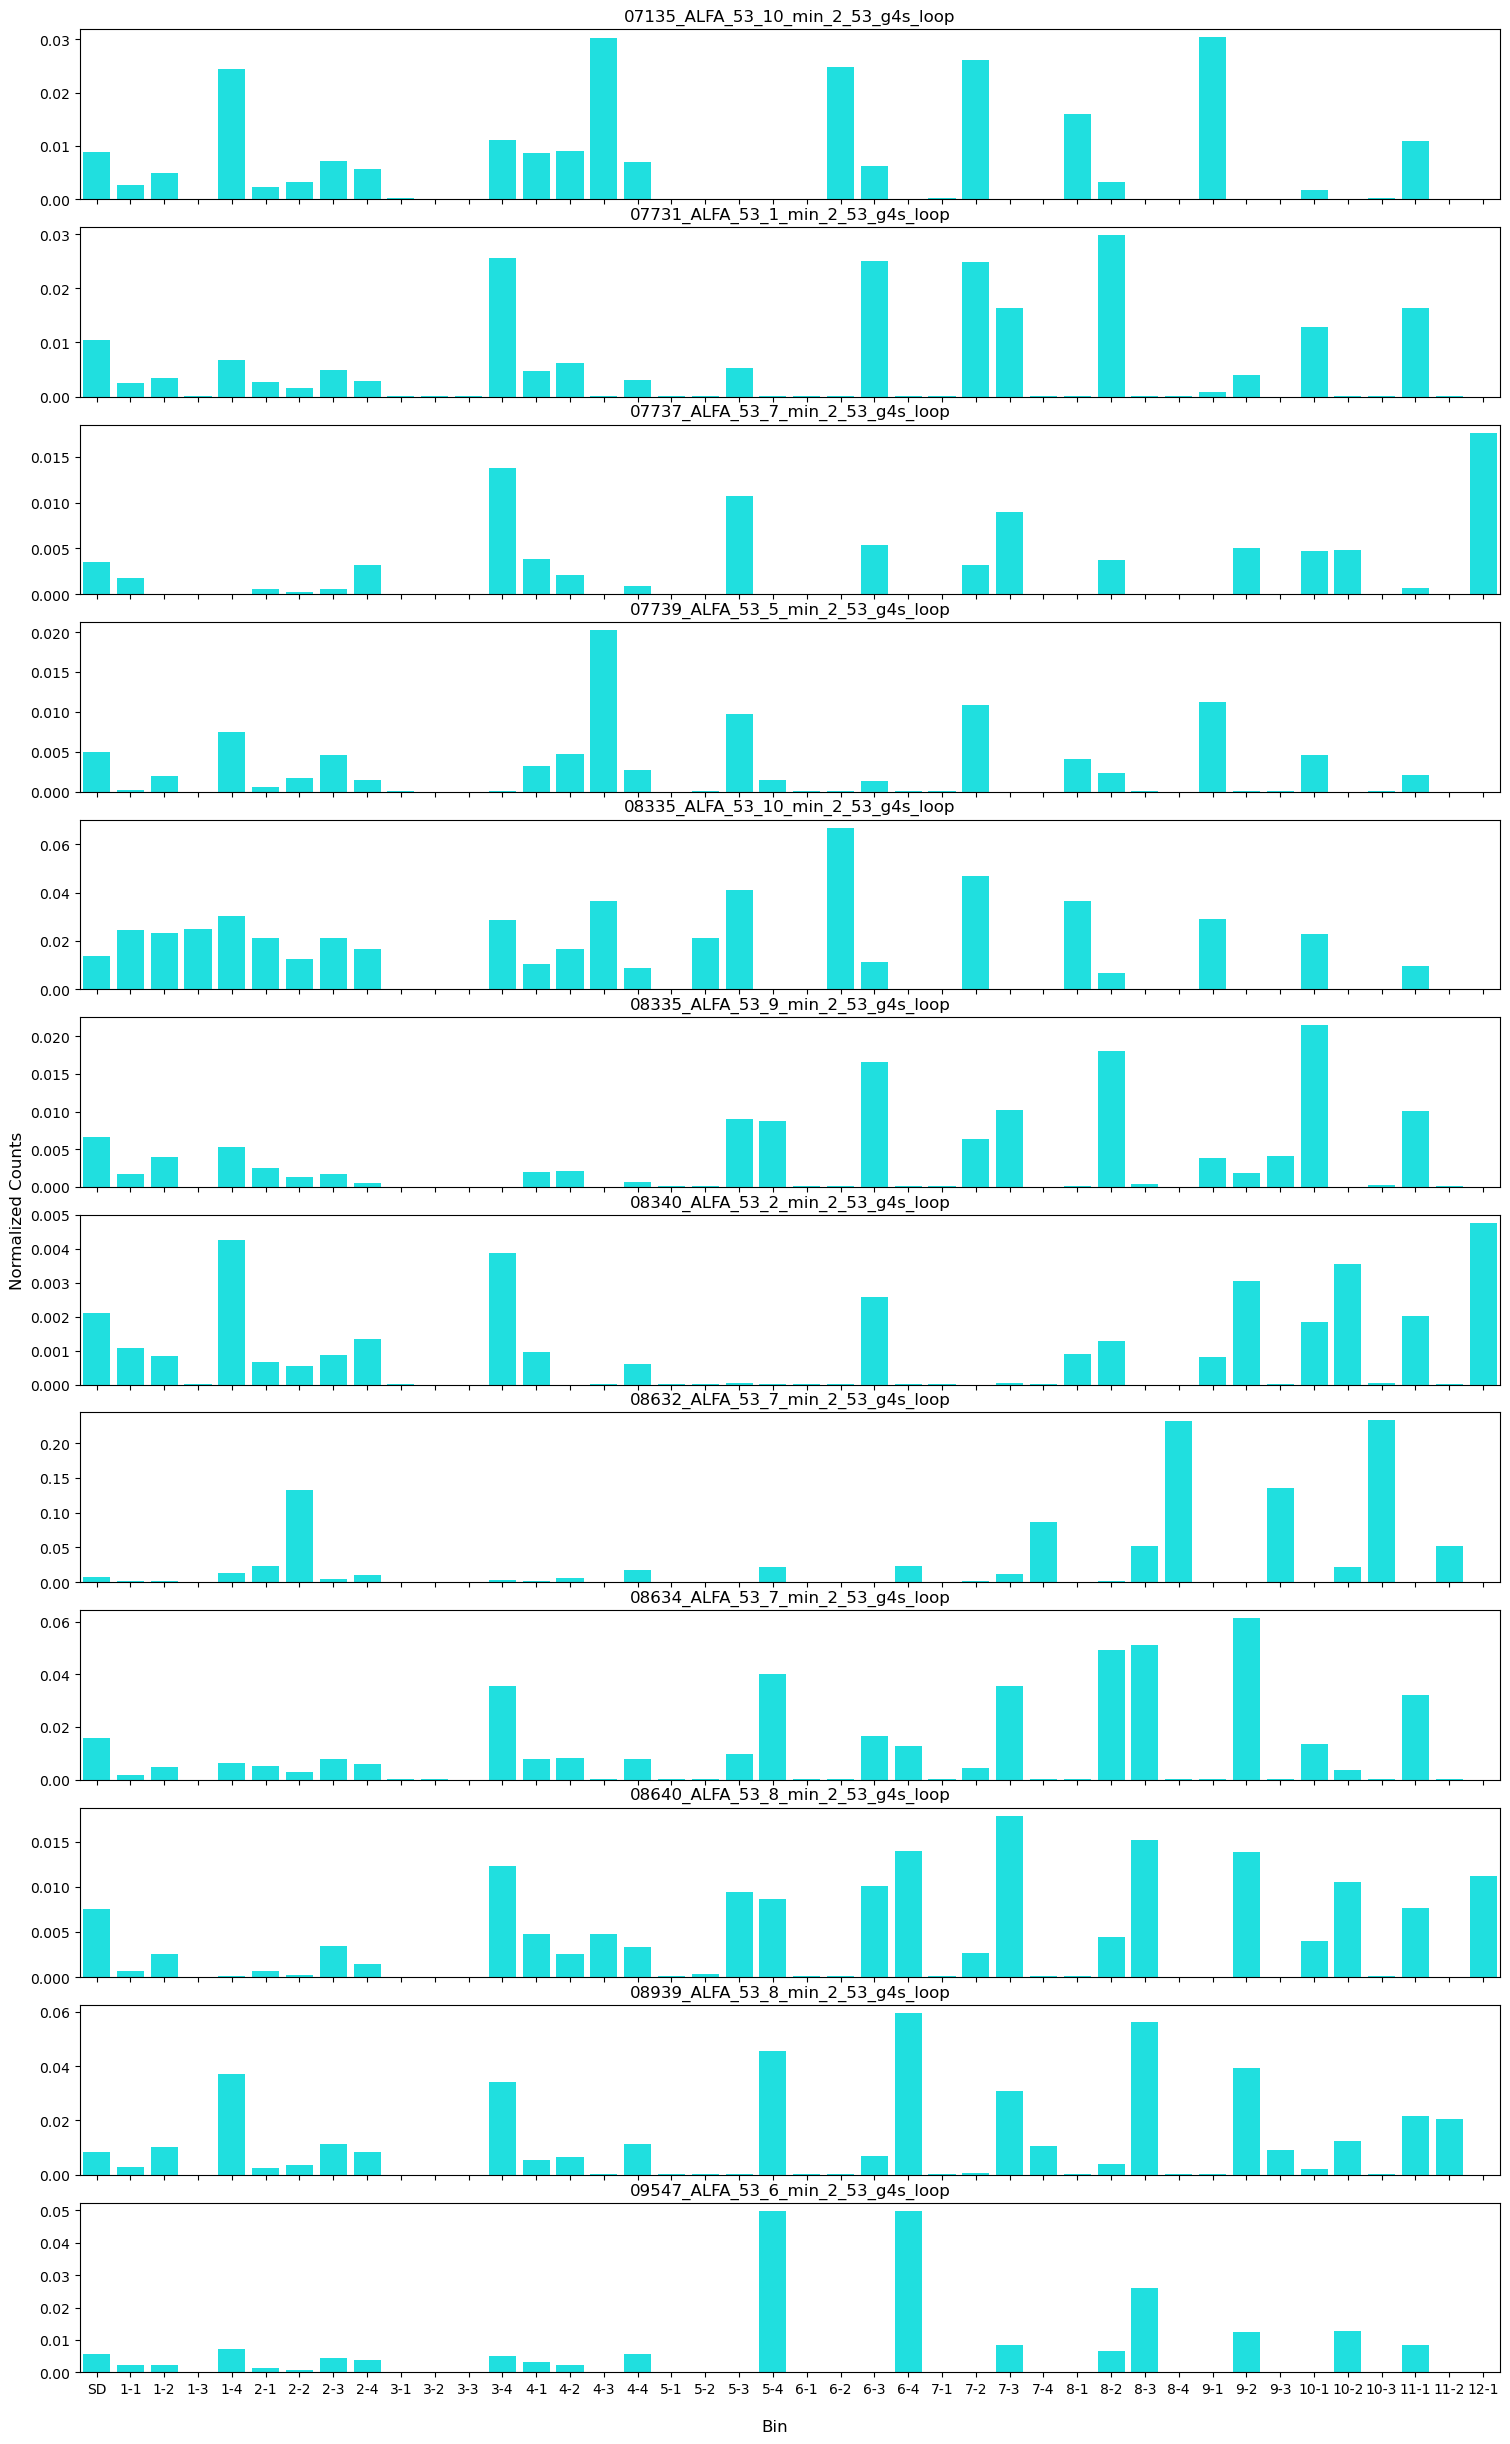

In [376]:
#plot counts for designs across all bins with counts data
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=1.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=['cyan'], order=['SD', '1-1', '1-2', '1-3', '1-4', '2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4',
                        '5-1', '5-2', '5-3', '5-4', '6-1', '6-2', '6-3', '6-4', '7-1', '7-2', '7-3', '7-4', '8-1', '8-2', '8-3', '8-4', '9-1', '9-2', '9-3', '10-1', '10-2', '10-3', '11-1', '11-2', '12-1']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.show()

<Figure size 640x480 with 0 Axes>

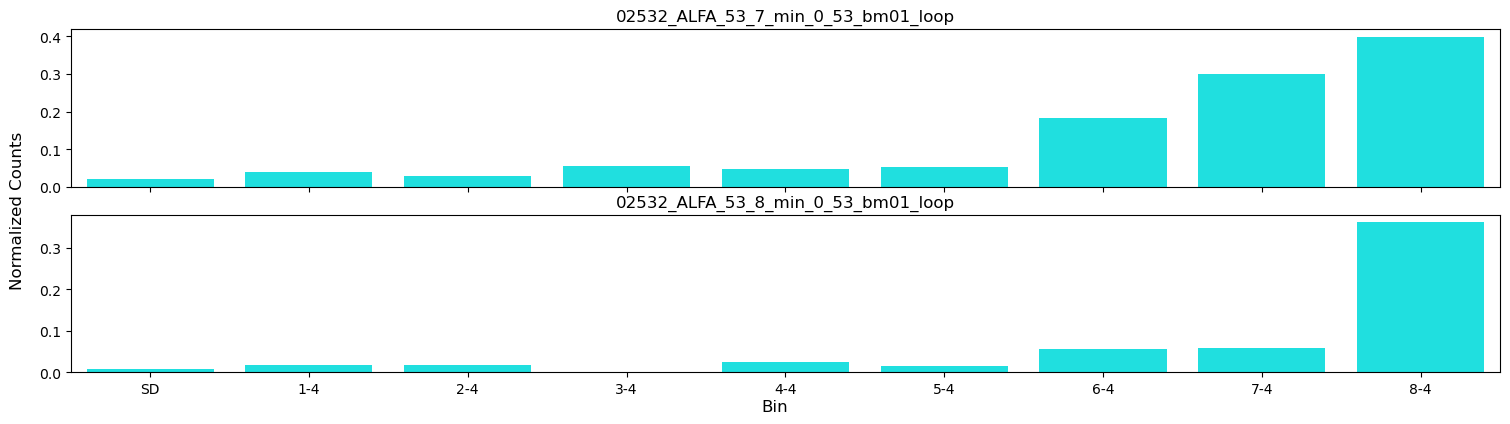

In [357]:
plt.clf()
#plot counts for designs in bin 4 only
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=1.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=['cyan'], order=['SD', '1-4', '2-4', '3-4', '4-4',
                         '5-4', '6-4', '7-4', '8-4']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.show()

Based on this line from Tite-Seq paper "Because the relationship between binding and KD is sigmoidal, the amount of bound antigen provides a quantitative readout of KD only when the concentration of antigen used in the labeling procedure is comparable in magnitude to KD." wondering if I can visualize or quantify the enrichment of counts in bins 3 and 4  for concentrations 7 and 8 which are around the expected Kd (31-100 pM). 

Could try simple analysis they did in Fig. 4, sup 5 which seems to work ok when Kd is close to the ligand concentration used:

"For each group at each antigen concentration (rows), we then computed the enrichment of each scFv in the high PE bins (bins 2,3) relative to the low PE bins (bins 0,1). In these enrichment calculations, the number of counts in each bin was re-weighted to accurately reflect the fraction of library cells falling within the fluorescence range of that bin."

In [358]:
print(norm_counts_table)

                                design   variable     value library_id  bin
0   02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-1-1  0.012511         r1  1-1
1   02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-1-1  0.001941         r1  1-1
2   02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-1-2  0.016134         r1  1-2
3   02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-1-2  0.004529         r1  1-2
4   02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-1-3  0.000195         r1  1-3
..                                 ...        ...       ...        ...  ...
79  02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-9-2  0.000831         r1  9-2
80  02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-9-3  0.303261         r1  9-3
81  02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-9-3  0.094091         r1  9-3
82  02532_ALFA_53_7_min_0_53_bm01_loop   r1-hs-SD  0.020857         r1   SD
83  02532_ALFA_53_8_min_0_53_bm01_loop   r1-hs-SD  0.008456         r1   SD

[84 rows x 5 columns]


In [ ]:
plt.clf()
#first pull out the data for concentration 7 or 8

#normalize across the binds for that cncentration for a given design

#plot the normalized bin4 counts

#could consider normalizing by expression data

#plot counts for designs in bin 4 only
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=1.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=['cyan'], order=['SD', '1-4', '2-4', '3-4', '4-4',
                         '5-4', '6-4', '7-4', '8-4']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.show()